# Homework 4 :


In [1]:
import pandas as pd
import numpy as np
#from IPython.display import Image
#from IPython.core.display import HTML 

from IPython.display import display, Math, Latex


# I - Guidelines

We want to predict a category, i.e. the skin color of the player. Let's figure out what to do following the diagram below, from scikit-learn. 

In [2]:
Image(url= "http://scikit-learn.org/stable/_static/ml_map.png", width=700)

# II - The Data
Let's take a look at the data and already drop what is not useful for the predictions.

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [3]:
df.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [112]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')


#df = df.reset_index().drop_duplicates(subset='playerShort', keep='first') # if we want to have an unique entrance per player


df = df.set_index('playerShort')

df = df[['height','weight', 'position','games','victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards','rater1', 'rater2','refNum','refCountry', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp']] # considering birthday (age) is not useful because we don't have the dates of individual matches


#df.head()
print(len(df))
#df.index.is_unique

146028


In [5]:
df.position.unique()  # We have to replace this with numerical values, as we do with the mapping below. 

array(['Attacking Midfielder', 'Right Winger', nan, 'Center Back',
       'Right Midfielder', 'Left Fullback', 'Defensive Midfielder',
       'Goalkeeper', 'Right Fullback', 'Left Winger', 'Left Midfielder',
       'Center Forward', 'Center Midfielder'], dtype=object)

The prediction of the skin color is checked with rater1 and rater2. We chose to drop the NaN data in the raters and choose only the data on which they agree. 

Notice that for a Random Forest classifier, there is no need to normalize the features, as no comparison is made between their magnitudes.

In [146]:
df.dropna(how='any', axis=0, inplace=True) # dropping NaN


df2 = df[df.rater1 == df.rater2]
df2['rater1'] = df2['rater1']*4  # the classifier only deals with integers
df2['meanIAT'] = df2['meanIAT']*1000  # the classifier only deals with integers
df2['meanExp'] = df2['meanExp']*100  # the classifier only deals with integers
df2['seIAT'] = df2['seIAT']*10000  # the classifier only deals with integers
df2['seExp'] = df2['seExp']*10000  # the classifier only deals with integers

df2 = np.round(df2,0) # the classifier only deals with integers

df2['position'] = df2['position'].map({'Goalkeeper':0, 'Attacking Midfielder':1, 'Right Winger':2, 'Left Winger':2,
       'Center Back':3, 'Left Fullback':4,'Right Fullback':4, 'Defensive Midfielder':5, 'Left Midfielder':6,
       'Right Midfielder':6,'Center Midfielder':7,'Center Forward':8}) # notice I've used symmetry between R and L


# remember goalkeepers are less likely to get a card. Not taken into account yet

df2.drop('rater2', axis=1, inplace=True)  

df2 = df2[(df2 >= 0)].dropna(how='any') # dropping negative values and NaN

#df2 = df2.dropna(how='any') # dropping NaN

#df2 = df2[(df2 > 0).all(1)]  # dropping negative values

#df2 = df2[df2['rater1'] >= 0]

len(df2)

C:\Users\mariele\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mariele\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\mariele\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

87636

We see that we have labeled data, this means we can use a classification algorithm. Moreover, with *less* than 100K sample, we can use [Linear Support Vector Classification](https://en.wikipedia.org/wiki/Support_vector_machine). Now, for the moment, let's suppose it won't work, neither K-Neighbors Classifiers. Let's directly move to Ensemble Classifiers as asked in the HW assignment.

In [147]:
df2.head(5)

,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,
alexander-tettey,180.0,68.0,5,1,0,0,1,0,0,0,0,4.0,4,4,325.0,127.0,33.0,54.0,130.0,138.0
anders-lindegaard,193.0,80.0,0,1,0,1,0,0,0,0,0,1.0,4,4,325.0,127.0,33.0,54.0,130.0,138.0
andreas-beck,180.0,70.0,4,1,1,0,0,0,0,0,0,0.0,4,4,325.0,127.0,33.0,54.0,130.0,138.0
antonio-rukavina,177.0,74.0,4,2,2,0,0,0,1,0,0,0.0,4,4,325.0,127.0,33.0,54.0,130.0,138.0
ashkan-dejagah,181.0,74.0,2,1,1,0,0,0,0,0,0,2.0,4,4,325.0,127.0,33.0,54.0,130.0,138.0


In [148]:
df2.columns

Index(['height', 'weight', 'position', 'games', 'victories', 'ties', 'defeats',
       'goals', 'yellowCards', 'yellowReds', 'redCards', 'rater1', 'refNum',
       'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'],
      dtype='object')

#  III - Machine Learning

Selecting the attributes and passing as X for scikit

In [149]:
y = df2.rater1

df2.drop('rater1', axis=1, inplace=True)  
X = df2

In [150]:
print(y.shape)
X.shape

(87636,)


(87636, 19)

## I - Feature Selection

Some tips on this can be found [here](https://www.quora.com/How-do-I-perform-feature-selection). For the moment, I'm gonna follow the more explicit and concise suggestions from [here](http://machinelearningmastery.com/feature-selection-machine-learning-python/), whose generalities are presented [here](http://machinelearningmastery.com/an-introduction-to-feature-selection/).

The bottom line here is that we should do feature selection in a different datase than the training dataset, otherwise we might overfit the data.

What about _cross-validation_? According to the [last link above](http://machinelearningmastery.com/an-introduction-to-feature-selection/), one should include feature selection within the inner-loop, i.e. feature selection should be performed on the prepared fold _right_ before the model is trained. Performing model selection and training on the selected features would generate biased results. It might occur that one model is enhanced by the selected feature and this model will get get better results, but that is just to an introduced bias. In other words,  *"when performing feature selection on all the data and then cross-validate, the test data in each fold of the CV procedure was also used to choose the features and this is what biases the performance analysis"*.

## Cross-validation

We will use cross-validation in order to tune the hyperparamaters. Give the discussion above, we would like to introduce the feature selection within the CV process.

Below, we just use the default parameters of RF classifier and slip the data into 30% test and 70% training parts.

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #deprecated: from sklearn.cross_validation import train_test_split
from sklearn import metrics

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #choose test size to be 30%


rf = RandomForestClassifier()
# fit the model to the training data (learn the coefficients)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

0.774561637062
(61345, 19) (61345,)
(26291, 19) (26291,)


In [152]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5) # the scores for each of the 5 folds of the CV
scores

array([ 0.73237715,  0.74712737,  0.75654088,  0.76016956,  0.74826771])

### GridSearchCV

But the above doesn't help much, since these are just the scores considering all features and the default hyperparameters of RF. Let's consider a popular method for parameter estimation: grid search (not necessarily the best) with cross validation, [see](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html#sphx-glr-auto-examples-model-selection-grid-search-digits-py). We start with simplicity, just exploring 2 HP: 

- number of trees: `n_estimators`
- tree depth: `max_depth`

In [154]:
from sklearn.model_selection import GridSearchCV

# Grid search params
n_trees = list(range(5,30,10))
tree_depth = list(range(5,20,10))
param_grid = dict(n_estimators=n_trees, max_depth=tree_depth)

print(param_grid)

{'n_estimators': [5, 15, 25], 'max_depth': [5, 15]}


In [155]:
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')  # TAKES FOREVER!!!
grid.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 15, 25], 'max_depth': [5, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [156]:
grid.best_score_

0.56819115432014244

In [157]:
grid.best_params_

{'max_depth': 15, 'n_estimators': 15}

### CV Scheme
Implementing a CV scheme: (http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html). Notice that all three methods below corresponde to the same CV (the `cross_val_score` helper giving a slightly different result)

In [158]:
import numpy as np
from sklearn import datasets, svm

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

svc = svm.SVC(C=1, kernel='linear')

X_folds = np.array_split(X_digits, 4)
y_folds = np.array_split(y_digits, 4)
scores = list()
for k in range(4):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.95777777777777773, 0.9376391982182628, 0.97327394209354123, 0.92873051224944325]


In [160]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=4)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
          for train, test in k_fold.split(X_digits)]

[0.95777777777777773,
 0.9376391982182628,
 0.97327394209354123,
 0.92873051224944325]

In [161]:
scores = cross_val_score(svc, X_digits, y_digits, cv=4, n_jobs=-1) # the scores for each of the 4 nodes of the CV
scores

array([ 0.95594714,  0.94235033,  0.96868009,  0.92808989])

Now I want to repeat the above for my data set and with a RF Classifier. 

The CV below gives a significantly different score compared to the helper `cross_val_score`.  **Why?**

In [162]:
import numpy as np

X_ = X
y_ = y

rf = RandomForestClassifier()

n_folds = 3

X_folds = np.array_split(X_, n_folds)
y_folds = np.array_split(y_, n_folds)
scores = list()
for k in range(n_folds):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k) # remove the item at the k position in the list, and return it
    X_train = np.concatenate(X_train) # reconstructs the list without item k
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(rf.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.72750924277694096, 0.77276461728056967, 0.7362042996029029]


In [163]:
scores = cross_val_score(rf, X_, y_, cv=n_folds, n_jobs=1) # scores for each of the 4 folds # n_jobs=-1: no of jobs set to no of cores
scores

array([ 0.572211  ,  0.76235794,  0.51658622])

## Tuning HP

For the moment, let's not do any feature selection. Let's do a personalized gridsearch

In [164]:
n_trees = list(range(20,40,10))
tree_depth = list(range(20,40,10))

X_ = X
y_ = y

n_folds = 2
X_folds = np.array_split(X_, n_folds)
y_folds = np.array_split(y_, n_folds)
scores = [0]
best_score = [0,0]
i=1
j=2

for k in range(n_folds):
    for l in range(len(n_trees)):
        for m in range(len(tree_depth)):
            rf = RandomForestClassifier(n_estimators=n_trees[l], max_depth=tree_depth[m])
            # We use 'list' to copy, in order to 'pop' later on
            X_train = list(X_folds)
            X_test  = X_train.pop(k) # remove the item at the k position in the list, and return it
            X_train = np.concatenate(X_train) # reconstructs the list without item k
            y_train = list(y_folds)
            y_test  = y_train.pop(k)
            y_train = np.concatenate(y_train)
            scores.append(rf.fit(X_train, y_train).score(X_test, y_test))
            if scores[i] > scores[i-1]:
                best_score.append(scores[i])
                if best_score[j] > max(best_score[:j-1]):
                    best = [k, n_trees[l],tree_depth[m], best_score[j]]
                    #print("n_fold= %s,  n_tree= %s, tree_depth = %s, best score= %s  " % (k, n_trees[l],tree_depth[m], best_score[j])) 
                j = j + 1
            i = i + 1
print (scores)
print (best_score)
print (best)

[0, 0.73298644392715318, 0.7518143228810078, 0.74745538363229724, 0.76724177278743899, 0.74040348715139892, 0.74277694098315761, 0.74275411931169844, 0.75904879273357984]
[0, 0, 0.73298644392715318, 0.7518143228810078, 0.76724177278743899, 0.74277694098315761, 0.75904879273357984]
[0, 30, 30, 0.76724177278743899]


#### Check the above using the helper `GridSearchCV`

In [74]:
from sklearn.model_selection import GridSearchCV

n_trees = list(range(20,40,10))
tree_depth = list(range(20,40,10))
param_grid = dict(n_estimators=n_trees, max_depth=tree_depth)


grid = GridSearchCV(rf, param_grid, cv=2)  # TAKES FOREVER!!! # not setting the scoring uses the default one from the estimator
grid.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30], 'max_depth': [20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [76]:
print(grid.best_score_)
print(grid.best_params_)

0.434606461834
{'n_estimators': 20, 'max_depth': 30}


### Including feature importance

In [165]:
n_trees = list(range(20,50,10))
tree_depth = list(range(20,50,10))


n_folds = 2
X_folds = np.array_split(X_, n_folds)
y_folds = np.array_split(y_, n_folds)
scores = [0]
best_score = [0,0]
i=1
j=2

for l in range(len(n_trees)):
    for m in range(len(tree_depth)):
        for k in range(n_folds):
            X_train = list(X_folds) # We use 'list' to copy, in order to 'pop' later on
            X_test  = X_train.pop(k) # remove the item at the k position in the list, and return it
            X_train = np.concatenate(X_train) # reconstructs the list without item k
            y_train = list(y_folds)
            y_test  = y_train.pop(k)
            y_train = np.concatenate(y_train)
            
            # doing feature selection
            rf = RandomForestClassifier(n_estimators=n_trees[l], max_depth=tree_depth[m])
            rf = rf.fit(X_train, y_train)
            rf.feature_importances_  
            model = SelectFromModel(rf, threshold=0.04, prefit=True)# selecting features with scores above 'threshold'
            X_train = model.transform(X_train)
            X_test = model.transform(X_test) ## is this really correct? otherwise I get an error.  ????
            
            scores.append(rf.fit(X_train, y_train).score(X_test, y_test))
            if scores[i] > scores[i-1]:
                best_score.append(scores[i])
                if best_score[j] > max(best_score[:j-1]):
                    best = [k, n_trees[l],tree_depth[m], best_score[j]]
                    #print("n_fold= %s,  n_tree= %s, tree_depth = %s, best score= %s  " % (k, n_trees[l],tree_depth[m], best_score[j])) 
                j = j + 1
            i = i + 1
print (scores)
print (best_score)
print (best)

[0, 0.82274407777625636, 0.69288876717330772, 0.834771098635264, 0.77150942535031264, 0.84145784837281479, 0.72919804646492314, 0.82637272353827196, 0.72730384773380807, 0.82171710256059149, 0.70112739057008533, 0.8434205121183076, 0.73965037199324479, 0.8263270801953535, 0.74549271988680454, 0.83999726139942488, 0.78832899721575611, 0.84812177643890641, 0.7680177096170524]
[0, 0, 0.82274407777625636, 0.834771098635264, 0.84145784837281479, 0.82637272353827196, 0.82171710256059149, 0.8434205121183076, 0.8263270801953535, 0.83999726139942488, 0.84812177643890641]
[0, 40, 40, 0.84812177643890641]


In [105]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=10, max_depth=10)

X_train = list(X_folds) # We use 'list' to copy, in order to 'pop' later on
X_test  = X_train.pop(1) # remove the item at the k position in the list, and return it
X_train = np.concatenate(X_train) # reconstructs the list without item k
y_train = list(y_folds)
y_test  = y_train.pop(1)
y_train = np.concatenate(y_train)

rf = rf.fit(X_train, y_train)
rf.feature_importances_  
print(X_train)
model = SelectFromModel(rf, threshold=0.04, prefit=True)
X_train = model.transform(X_train)
print(X_train)

[[  1.79000000e+02   8.20000000e+01   2.00000000e+00 ...,  -2.00000000e+01
    4.90000000e+01   6.15000000e+02]
 [  1.80000000e+02   6.80000000e+01   5.00000000e+00 ...,   5.40000000e+01
    1.30000000e+02   1.38000000e+02]
 [  1.93000000e+02   8.00000000e+01   0.00000000e+00 ...,   5.40000000e+01
    1.30000000e+02   1.38000000e+02]
 ..., 
 [  1.90000000e+02   8.20000000e+01   3.00000000e+00 ...,   3.40000000e+01
    7.97400000e+03   2.00000000e+00]
 [  1.86000000e+02   8.10000000e+01   6.00000000e+00 ...,   3.40000000e+01
    7.97400000e+03   2.00000000e+00]
 [  1.74000000e+02   7.80000000e+01   4.00000000e+00 ...,   3.40000000e+01
    7.97400000e+03   2.00000000e+00]]
[[  1.79000000e+02   8.20000000e+01   2.00000000e+00   4.00000000e+01
    4.90000000e+01]
 [  1.80000000e+02   6.80000000e+01   5.00000000e+00   1.27000000e+02
    1.30000000e+02]
 [  1.93000000e+02   8.00000000e+01   0.00000000e+00   1.27000000e+02
    1.30000000e+02]
 ..., 
 [  1.90000000e+02   8.20000000e+01   3.000

## 2) Recursive Feature Elimination with Logistic Regression


maybe this one does not make sense here... why?

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True False False False False False False False False False False False
  True  True False False  True False False]
Feature Ranking: [ 1  3 10  6 11 12  9 14  8 16 15  2  1  1  5 13  1  4  7]


## 3) Principal Component Analysis

In [214]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [  9.44e-01   5.62e-02   3.11e-05]
[[ -3.57e-04  -9.00e-04  -1.15e-04  -3.61e-04  -3.81e-04  -5.78e-05
    7.72e-05  -2.07e-04  -3.88e-04   0.00e+00   0.00e+00   1.03e-01
   -1.25e-03  -4.12e-03   6.97e-01  -1.91e-04  -3.01e-03   7.09e-01
   -1.34e-03]
 [  1.39e-03   9.04e-05  -1.81e-03  -2.79e-03  -1.14e-03  -1.98e-03
    3.33e-04  -2.49e-03  -1.03e-03   0.00e+00   0.00e+00   9.95e-01
    9.78e-03  -6.21e-03  -7.36e-02   4.24e-04  -4.86e-03  -7.17e-02
    1.37e-03]
 [  1.08e-02  -9.33e-02   1.50e-02   2.00e-01   5.90e-02   6.57e-02
    7.58e-02   7.81e-03   7.51e-02   0.00e+00   0.00e+00   4.39e-03
   -7.30e-01  -4.48e-01   2.04e-01  -2.86e-02  -2.73e-01  -2.06e-01
   -1.97e-01]]


## Splitting into training and testing data

In [129]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [130]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71785, 3)
(71785,)
(23929, 3)
(23929,)


In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
# instantiate
rf = RandomForestClassifier()

# fit the model to the training data (learn the coefficients)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# print the intercept and coefficients
print(rf.intercept_)
print(rf.coef_)

AttributeError: 'RandomForestClassifier' object has no attribute 'intercept_'

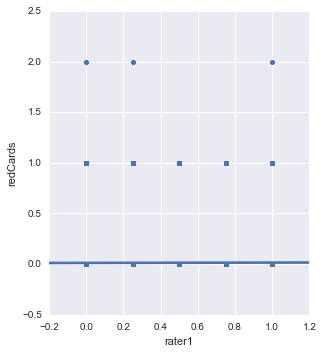

In [42]:
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df3, x_vars=['rater1'], y_vars='redCards', size=5, aspect=0.9, kind='reg')